<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093MLassignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

--2020-10-25 17:34:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-10-25 17:34:46 (110 MB/s) - ‘iris.data’ saved [4551/4551]



**Implementation of Single Layer Perceptron**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = (df[feature_name] - df[feature_name].min()) / (df[feature_name].max() - df[feature_name].min())
    return result

In [ ]:
col_names=['A','B','C','D','target']
data=pd.read_csv('iris.data',names=col_names)
#loading data and read class label into different varible
features=data[['A','B','C','D']]
classes=data[['target']]

In [ ]:
flower={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
features=normalize(features)
features.insert(loc=0,column='A1',value=1)
#mappinf the taget class values with 1,2,3 for different flower
classes['target']=classes['target'].map(flower)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
def accu(X,Y): #calculating accuracy 
  z=0
  for i,j in zip(X,Y):
    if i==j:
      z+=1
  return z/len(Y)*100

def sigmoid(x): #sigmoid function
    pred= 1/(1+np.exp(-x))
    pre=[]
    
    for i in pred.copy():
      if(i>=0 and i<=0.33):
        z=1
      elif(i>0.33 and i<=0.66):
        z=2
      elif(i>0.66):
        z=3
      pre.append(z)
    return pre
def SLP(X,Y,iter,alpha,weights): #traing model as single layer with single neuron will behave as gradient descent 
  for _ in range(iter):
    pred=np.array(sigmoid(X@weights))   #forward propagation
    weights=weights-(alpha)*(np.sum(X*(pred-Y).reshape(-1,1),axis=0))  #updating weights with backpropagation
  return weights  

In [ ]:
z=1
df=[]
per=10
for _ in range(6): #train model for randomly x% testset and remaing train set 
  z-=0.1
  tea=[]
  tra=[]
  for corr in range(10):  #Compute training and testing accuracy using SLP for 10 independent simulations

    X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=z,stratify=classes['target'])
    weights = np.array([round(np.random.uniform(low=-1,high=1),2) for _ in range(5)])
    weights=weights.T
    X_train=X_train.to_numpy()
    Y_train=y_train['target'].ravel()
    weights=SLP(X_train,Y_train,1000,0.01,weights)
    X_T=X_test.to_numpy()
    TEA=round(accu(sigmoid(X_T@weights),y_test['target'].ravel()),2)
    TRA=round(accu(sigmoid(X_train@weights),Y_train.ravel()),2)
    tea.append(TEA)
    tra.append(TRA)
  TEA=sum(tea)/len(tea)
  TRA=sum(tra)/len(tra)
  print("Accuracy for test size {}%:".format(z*100))
  print("test accuracy",TEA)
  print("train accuracy",TRA)
  
  df.append([per,TRA,TEA])
  per+=10

Accuracy for test size 90.0%:
test accuracy 86.37
train accuracy 100.0
Accuracy for test size 80.0%:
test accuracy 92.25
train accuracy 99.667
Accuracy for test size 70.0%:
test accuracy 93.869
train accuracy 99.546
Accuracy for test size 60.00000000000001%:
test accuracy 94.72599999999998
train accuracy 99.83099999999999
Accuracy for test size 50.000000000000014%:
test accuracy 95.52699999999999
train accuracy 98.92
Accuracy for test size 40.000000000000014%:
test accuracy 95.9
train accuracy 98.203


In [ ]:
result=pd.DataFrame(df,columns=['random data(in %)', 'train accuracy','test accuracy'])
result.to_csv('results.csv')
print(result)

   random data(in %)  train accuracy  test accuracy
0                 10         100.000         86.370
1                 20          99.667         92.250
2                 30          99.546         93.869
3                 40          99.831         94.726
4                 50          98.920         95.527
5                 60          98.203         95.900


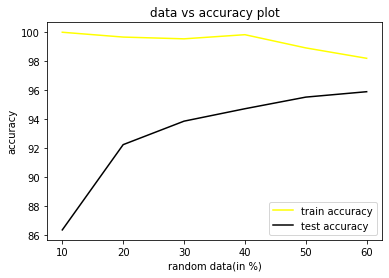

<Figure size 432x288 with 0 Axes>

In [ ]:
ax=plt.gca()
result.plot(x='random data(in %)',y='train accuracy',color='yellow',xlabel='random data in percentage',ylabel='accuracy',ax=ax,kind='line')
result.plot(x='random data(in %)',y='test accuracy',color='black',title='data vs accuracy plot',ax=ax,kind='line')
plt.show()
plt.savefig('fig.png')

**SLP** **with one vs all**

In [ ]:
col=['A','B','C','D','class']
dataset=pd.read_csv('iris.data',names=col) #load dataset
def normalize(df): #nomralising
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = (df[feature_name] - df[feature_name].min()) / (df[feature_name].max() - df[feature_name].min())
    return result
dat=dataset
mapp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
dat=pd.get_dummies(dat['class'],columns=['types'])  #one hot encoding 
data=dataset.join(dat) #different class and features
data.head()

,A,B,C,D,class,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [ ]:
def sigmoid(Z): #sigmoid function
  return 1/(1+np.exp(-Z))
def mapp(A):  #mapping maximum value in the output of one vs all for their respective class
  arr=[]
  for row in A:
    c=[]
    for col in row:
      if col>=0.5:
        c.append(1)
      else:
        c.append(0)
    arr.append(c)
  arr=np.array(arr)
  return arr  
def relu(Z):  #relu activation for hidden layers
  return np.maximum(0,Z)

def sigmoid_derivative(A,dA): #derivation of sigmoid function 
  return dA*A*(1-A)
def relu_derivative(dA,Z):  #derivation of relu for back propagation
  dZ=np.array(dA,copy=True)
  dZ[Z<=0]=0
  return dZ
def predict(param,X,Y,length): #prediction of model
  A=X
  for i in range(length):
    Z=params["W"+str(i+1)]@A+params["b"+str(i+1)]
    if i+1!=length:
      A=relu(Z)
  Z=Z.T
  Z=(Z == Z.max(axis=1)[:,None]).astype(int)
  k=np.sum(np.all(Z==Y,axis=1))
  return k/len(Y)*100

In [ ]:
def deriv(derivative,dZ,pramams,length):  #backpropagation for getting derivation of Weights,bias,Z(W*A+b),A=g(Z)[activation]
  derivative["dZ"+str(length)]=dZ
  A_p=params["A"+str(length-1)]
  dW=(1/A_p.shape[1])*np.dot(dZ,A_p.T)
  db=(1/A_p.shape[1])*np.sum(dZ,axis=1,keepdims=True)
  dA_p=params["W"+str(length)].T@dZ
  derivative["dW"+str(length)]=dW
  derivative["db"+str(length)]=db
  if length-1!=0:
    derivative["dA"+str(length-1)]=dA_p

In [ ]:
def MLP(lr,iter,X,Y,para,length): #traing model
 
  for _ in range(iter):
    A=X
    para["A0"]=A
    for l in range(1,length):  #forward propagation
      Z=para["W"+str(l)]@A+para["b"+str(l)]
      A=relu(Z)
      para["Z"+str(l)]=Z
      para["A"+str(l)]=A

    Z=para["W"+str(length)]@A+para["b"+str(length)]
    A=sigmoid(Z)   #output layer having 3 neuron for one vs all model
    para["Z"+str(length)]=Z
    para["A"+str(length)]=A
    A=mapp(A)
    derivative={}
    dZ=A-Y  #error
    deriv(derivative,dZ,para,length)   #back propagation to calcuale all derivative of weights,bias,Z,A
    for l in reversed(range(length-1)): # #back propagation for hidden layer
      dZ=relu_derivative(derivative["dA"+str(l+1)],para["Z"+str(l+1)])
      deriv(derivative,dZ,para,l+1)  

    for i in range(length): #updating weights
      para["W"+str(i+1)]-=lr*derivative["dW"+str(i+1)]
      para["b"+str(i+1)]-=lr*derivative["db"+str(i+1)]
  return para

Enter the number of features:4
enter the learning rate:0.01
enter the epoch:1500
Accuracy for test size 90.0%:
test accuracy  68.296 %
train accuracy  90.666 %
Accuracy for test size 80.0%:
test accuracy  86.08500000000001 %
train accuracy  91.66499999999999 %
Accuracy for test size 70.0%:
test accuracy  83.39800000000001 %
train accuracy  90.68100000000001 %
Accuracy for test size 60.00000000000001%:
test accuracy  90.768 %
train accuracy  94.40800000000002 %
Accuracy for test size 50.000000000000014%:
test accuracy  87.23799999999999 %
train accuracy  91.48700000000001 %
Accuracy for test size 40.000000000000014%:
test accuracy  86.556 %
train accuracy  92.47299999999998 %
   random data(in %)  train accuracy  test accuracy
0                 10          90.666         68.296
1                 20          91.665         86.085
2                 30          90.681         83.398
3                 40          94.408         90.768
4                 50          91.487         87.238
5   

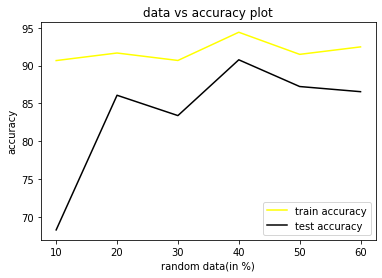

<Figure size 432x288 with 0 Axes>

In [ ]:
z=1
df=[]
per=10
layers_neuron=[]
f=int(input("Enter the number of features:"))
layers_neuron.append(f)
x=0

for i in range(x):
  y=int(input("enter the number of neurons in layer {}:".format(i+1)))
  layers_neuron.append(y)
layers_neuron.append(len(dataset['class'].unique()))
lr=float(input("enter the learning rate:"))
epoch=int(input("enter the epoch:"))
for _ in range(6): #computing accuracy for different size of data
  z-=0.1
  tea=[]
  tra=[]
  for cross in range(10): #Compute training and testing accuracy using MLP for 10 independent simulations
    
    X_tr, X_te, y_train, y_test = train_test_split(data.iloc[:,:4], data.iloc[:,-3:], test_size=z)

    X_train=normalize(X_tr)
    X_test=normalize(X_te)
    X_train=X_train.to_numpy()
    X_test=X_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()
    params={} 
    for i in range(1,len(layers_neuron)):  #initializing weights for layers
      params["W"+str(i)]=np.random.rand(layers_neuron[i],layers_neuron[i-1])
      params["b"+str(i)]=np.ones((layers_neuron[i],1))
    length=len(params)//2   #number of layers
    param=MLP(lr,epoch,X_train.T,y_train.T,params,length)
    
    TEA=round(predict(param,X_test.T,y_test,length),2)
    TRA=round(predict(param,X_train.T,y_train,length),2)
    tea.append(TEA)
    tra.append(TRA)
  TEA=sum(tea)/len(tea)
  TRA=sum(tra)/len(tra)
  print("Accuracy for test size {}%:".format(z*100))
  print("test accuracy ",TEA,"%")
  print("train accuracy ",TRA,"%")
  
  df.append([per,TRA,TEA])
  per+=10

result=pd.DataFrame(df,columns=['random data(in %)', 'train accuracy','test accuracy'])
result.to_csv('results_slp_onevall.csv')  # saving model in excel sheet
print(result)
ax=plt.gca()
result.plot(x='random data(in %)',y='train accuracy',color='yellow',xlabel='random data in percentage',ylabel='accuracy',ax=ax,kind='line')
result.plot(x='random data(in %)',y='test accuracy',color='black',title='data vs accuracy plot',ax=ax,kind='line')
plt.show()  #plot the accuracy with data size
plt.savefig('fig1.png')  #saving model

**MLP**

In [ ]:
col=['A','B','C','D','class']
dataset=pd.read_csv('iris.data',names=col) #load dataset

In [ ]:
def normalize(df): #nomralising
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = (df[feature_name] - df[feature_name].min()) / (df[feature_name].max() - df[feature_name].min())
    return result

In [ ]:
dat=dataset
mapp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
dat=pd.get_dummies(dat['class'],columns=['types'])  #one hot encoding 
data=dataset.join(dat) #different class and features
data.head()

,A,B,C,D,class,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [ ]:
def sigmoid(Z): #sigmoid function
  return 1/(1+np.exp(-Z))
def mapp(A):  #mapping maximum value in the output of one vs all for their respective class
  arr=[]
  for row in A:
    c=[]
    for col in row:
      if col>=0.5:
        c.append(1)
      else:
        c.append(0)
    arr.append(c)
  arr=np.array(arr)
  return arr  
def relu(Z):  #relu activation for hidden layers
  return np.maximum(0,Z)

def sigmoid_derivative(A,dA): #derivation of sigmoid function 
  return dA*A*(1-A)
def relu_derivative(dA,Z):  #derivation of relu for back propagation
  dZ=np.array(dA,copy=True)
  dZ[Z<=0]=0
  return dZ
def predict(param,X,Y,length): #prediction of model
  A=X
  for i in range(length):
    Z=params["W"+str(i+1)]@A+params["b"+str(i+1)]
    if i+1!=length:
      A=relu(Z)
  Z=Z.T
  Z=(Z == Z.max(axis=1)[:,None]).astype(int)
  k=np.sum(np.all(Z==Y,axis=1))
  return k/len(Y)*100

In [ ]:
def deriv(derivative,dZ,pramams,length):  #backpropagation for getting derivation of Weights,bias,Z(W*A+b),A=g(Z)[activation]
  derivative["dZ"+str(length)]=dZ
  A_p=params["A"+str(length-1)]
  dW=(1/A_p.shape[1])*np.dot(dZ,A_p.T)
  db=(1/A_p.shape[1])*np.sum(dZ,axis=1,keepdims=True)
  dA_p=params["W"+str(length)].T@dZ
  derivative["dW"+str(length)]=dW
  derivative["db"+str(length)]=db
  if length-1!=0:
    derivative["dA"+str(length-1)]=dA_p

In [ ]:
def MLP(lr,iter,X,Y,para,length): #traing model
 
  for _ in range(iter):
    A=X
    para["A0"]=A
    for l in range(1,length):  #forward propagation
      Z=para["W"+str(l)]@A+para["b"+str(l)]
      A=relu(Z)
      para["Z"+str(l)]=Z
      para["A"+str(l)]=A

    Z=para["W"+str(length)]@A+para["b"+str(length)]
    A=sigmoid(Z)   #output layer having 3 neuron for one vs all model
    para["Z"+str(length)]=Z
    para["A"+str(length)]=A
    A=mapp(A)
    derivative={}
    dZ=A-Y  #error
    deriv(derivative,dZ,para,length)   #back propagation to calcuale all derivative of weights,bias,Z,A
    for l in reversed(range(length-1)): # #back propagation for hidden layer
      dZ=relu_derivative(derivative["dA"+str(l+1)],para["Z"+str(l+1)])
      deriv(derivative,dZ,para,l+1)  

    for i in range(length): #updating weights
      para["W"+str(i+1)]-=lr*derivative["dW"+str(i+1)]
      para["b"+str(i+1)]-=lr*derivative["db"+str(i+1)]
  return para

Enter the number of features:4
Enter the nuber of hidden layer u want:2
enter the number of neurons in layer 1:6
enter the number of neurons in layer 2:5
enter the learning rate:0.1
enter the epoch:1500
Accuracy for test size 90.0%:
test accuracy  88.74300000000002 %
train accuracy  100.0 %
Accuracy for test size 80.0%:
test accuracy  91.167 %
train accuracy  99.333 %
Accuracy for test size 70.0%:
test accuracy  91.79400000000001 %
train accuracy  98.41 %
Accuracy for test size 60.00000000000001%:
test accuracy  94.06899999999999 %
train accuracy  99.15299999999999 %
Accuracy for test size 50.000000000000014%:
test accuracy  93.423 %
train accuracy  97.298 %
Accuracy for test size 40.000000000000014%:
test accuracy  95.244 %
train accuracy  96.743 %
   random data(in %)  train accuracy  test accuracy
0                 10         100.000         88.743
1                 20          99.333         91.167
2                 30          98.410         91.794
3                 40          99

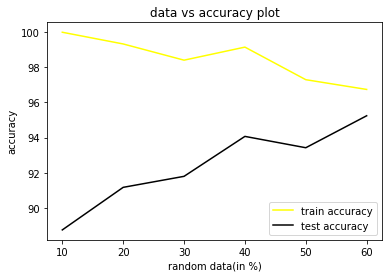

<Figure size 432x288 with 0 Axes>

In [ ]:
z=1
df=[]
per=10
layers_neuron=[]
f=int(input("Enter the number of features:"))
layers_neuron.append(f)
x=int(input('Enter the nuber of hidden layer u want:'))

for i in range(x):
  y=int(input("enter the number of neurons in layer {}:".format(i+1)))
  layers_neuron.append(y)
layers_neuron.append(len(dataset['class'].unique()))
lr=float(input("enter the learning rate:"))
epoch=int(input("enter the epoch:"))
for _ in range(6): #computing accuracy for different size of data
  z-=0.1
  tea=[]
  tra=[]
  for cross in range(10): #Compute training and testing accuracy using MLP for 10 independent simulations
    
    X_tr, X_te, y_train, y_test = train_test_split(data.iloc[:,:4], data.iloc[:,-3:], test_size=z)

    X_train=normalize(X_tr)
    X_test=normalize(X_te)
    X_train=X_train.to_numpy()
    X_test=X_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()
    params={} 
    for i in range(1,len(layers_neuron)):  #initializing weights for layers
      params["W"+str(i)]=np.random.rand(layers_neuron[i],layers_neuron[i-1])
      params["b"+str(i)]=np.ones((layers_neuron[i],1))
    length=len(params)//2   #number of layers
    param=MLP(lr,epoch,X_train.T,y_train.T,params,length)
    
    TEA=round(predict(param,X_test.T,y_test,length),2)
    TRA=round(predict(param,X_train.T,y_train,length),2)
    tea.append(TEA)
    tra.append(TRA)
  TEA=sum(tea)/len(tea)
  TRA=sum(tra)/len(tra)
  print("Accuracy for test size {}%:".format(z*100))
  print("test accuracy ",TEA,"%")
  print("train accuracy ",TRA,"%")
  
  df.append([per,TRA,TEA])
  per+=10

result=pd.DataFrame(df,columns=['random data(in %)', 'train accuracy','test accuracy'])
result.to_csv('results_MLP.csv')  # saving model in excel sheet
print(result)
ax=plt.gca()
result.plot(x='random data(in %)',y='train accuracy',color='yellow',xlabel='random data in percentage',ylabel='accuracy',ax=ax,kind='line')
result.plot(x='random data(in %)',y='test accuracy',color='black',title='data vs accuracy plot',ax=ax,kind='line')
plt.show()  #plot the accuracy with data size
plt.savefig('fig2.png')  #saving model